# Homework exercise 3
## Deadline: upload to Moodle by 20 November 18:00 h

__Suggestion: take this notebook and simply add your code and explanations.__

If you prefer to use .py files, you are expected to also include a PDF containing the output of your code and your explanations. Still, the code needs to be in a form that can be easily run on another computer.

__Name 1: Isabel Gerstner__

__Name 2: Nils Kerwien__

__Name 3:__


Reminder: you are required to attend class on 21 November to earn points for this homework exercise unless you have a valid reason for your absence.



#### Covered calls & option pricing via simulation

Suppose you try to decide on whether to simply hold a long position in a stock (portfolio A) or the long position combined with a short position in a call option on the stock (portfolio B).

For all questions, assume a time horizon of one year = 252 trading days, an initial stock price of 100, and a European option with maturity one year from now. 

The stock price is assumed to follow a geometric Brownian motion with an expected annual return of $\mu = 12\%$, whereas the risk-free interest rate is $r_f=  1\%$ continuously compounded. Values for the standard deviation $\sigma$ are given in question 1.

This means that, to simulate discrete returns over a period of one year with expectation $\mu$ and standard deviation $\sigma$ , you will need to use a log-normal distribution with mean $\mu-\frac{\sigma^2}{2}$ and volatility $\sigma$.

When you are asked to simulate data, always do so for 10000 random draws.

1. Simulate the return of portfolios A and B for all combinations of the following parameters (disregarding the premium earned from writing the option for now).

    * annual stock return volatility of 20, 30, 40, 50 percent
    * call option strike prices of 90, 100, 110, 120, 130, 140, 150

   For each combination of parameters, use the simulated data to estimate the expected Sharpe ratios of the portfolio A. It is defined as
$s=\frac{E(r)-r_f}{\sigma(r)}$, where $\sigma$ stands for (the simulation-based estimate of the) standard deviation. 

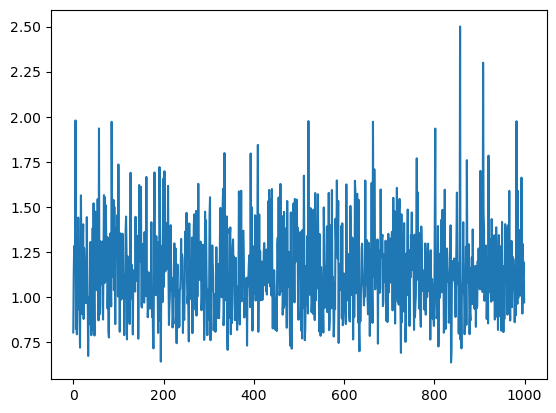

Asset A
                                  Expected Profit  Sharpe-Ratio
Volatility:0.2, Strike Price:90         12.611692      0.553966
Volatility:0.2, Strike Price:100        12.449682      0.546632
Volatility:0.2, Strike Price:110        12.700568      0.558593
Volatility:0.2, Strike Price:120        13.131879      0.579136
Volatility:0.2, Strike Price:130        12.485458      0.548018
Volatility:0.2, Strike Price:140        12.913216      0.563247
Volatility:0.2, Strike Price:150        12.922199      0.568071
Volatility:0.3, Strike Price:90         13.018194      0.374677
Volatility:0.3, Strike Price:100        12.195393      0.354140
Volatility:0.3, Strike Price:110        13.224693      0.369423
Volatility:0.3, Strike Price:120        12.351189      0.357786
Volatility:0.3, Strike Price:130        12.625435      0.362916
Volatility:0.3, Strike Price:140        13.183880      0.375169
Volatility:0.3, Strike Price:150        12.953671      0.379441
Volatility:0.4, Strike Price:90 

In [402]:
import numpy as np
import pandas as pd
import math as m
import matplotlib.pyplot as plt
%matplotlib inline

# set seed
rng = np.random.default_rng(1234)

#define parameters
rf= 0.01
mu = 0.12
vola = (0.2,0.3,0.4,0.5)
#vola = 0.3
call_sp = (90, 100, 110, 120, 130, 140, 150)
#call_sp = 90

        # Assets are uncorrelated?

# simulate "random" yearly returns, just to show how it works
# size is set to 1000 just to see whats going on for vola=0.2
returns_a = rng.lognormal(mean=(mu-(vola[0]*vola[0])/2), sigma=vola[0], size=1000)
plt.plot(returns_a)
plt.show()


# store Profits, Sharpe-Ratio and Expected profits in a list:
profit, sharp, profit_exp_l, profit_std_l, combinations = [], [], [], [], []
profit_b, sharp_b, profit_exp_l_b, profit_std_l_b, combinations_b = [], [], [], [], []

# Loop for asset A
for i in vola:
    for j in call_sp:
        profit=[]
        # simulate "random" yearly returns
        returns_a = rng.lognormal(mean=(mu-(i*i)/2), sigma=i, size=10000)

        # return from long position
        for returns in returns_a:
            profit.append(100*returns - 100)
        
        # calculate Expected profit by taking the mean
        profit_exp = (np.mean(np.array(profit)))
        profit_exp_l.append(  np.mean(np.array(profit)))

        # simulation based estimate of standard deviation
        profit_std = np.std(np.array(profit))
        profit_std_l.append( np.std(np.array(profit)))

        # define Sharpe-Ratio
        sharp.append( ((profit_exp - rf) / profit_std))
                
        # append a combination of the vola and strike price to get an overview of the results. 
        combinations.append("Volatility:" + str(i) + ", Strike Price:" + str(j))

data = {"Expected Profit":profit_exp_l,"Sharpe-Ratio": sharp} 
df = pd.DataFrame(data, index = combinations)
print("Asset A")
print(df)

print("Asset A has almost the same expected Return(converges to true mean of return under Law of large numbers)." +
      "For increasing Volatility it makes sense that due to constant E[R] the sharpe Ratio is decreasing. ")

# Loop for asset B
for i in vola:
    for j in call_sp:
        profit_b=[] 
        #clear the list before every run
        
        # simulate "random" yearly returns
        returns_a = rng.lognormal(mean=(mu-(i*i)/2), sigma=i, size=10000)

        # return from long position (100*returns - 100)
        # minus what seller has to pay european option with strike price call_sp
        for returns in returns_a:
            if (100*returns) < j:
                profit_b.append((100*returns - 100))  # option will not be executed for r below strike price
            else:
                profit_b.append((100*returns - 100) - (100*returns -100 - (j - 100))) #which simplifies to j-100, maximum that can be earned with this is strikeprice!
                                
        # calculate Expected profit by taking the mean
        profit_exp_b = (np.mean(np.array(profit_b)))
        profit_exp_l_b.append(  np.mean(np.array(profit_b)))

        # simulation based estimate of standard deviation
        profit_std_b = np.std(np.array(profit_b))
        profit_std_l_b.append( np.std(np.array(profit_b)))
        
        # define Sharpe-Ratio
        sharp_b.append( ((profit_exp_b - rf) / profit_std_b))
                
        # append a combination of the vola and strike price to get an overview of the results. 
        combinations_b.append("Volatility:" + str(i) + ", Strike Price:" + str(j))

data_B = {"Expected Profit":profit_exp_l_b,"Sharpe-Ratio": sharp_b} 
df_B = pd.DataFrame(data_B, index = combinations_b)

print("_____________________")
print("Asset B")
print(df_B)

print("Asset B has an increasing return in higher strike prices, since the strikeprice determines an upper limit in the potential profit.")
print("Of course all returns are lower than for Portfolio A, cause we didn't account for the short-position premium.")

2. Assume you want the Sharpe ratio of portfolio B to be equal to that of A. Compute the option premia you would require for this to hold true. Plot the premia in a 3D scatter plot (possible with Matplotlib), where you use the x-axis for the strike price, the y-axis for volatility, and the z-axis for the option premia.

In [401]:
# To equalize the Sharpe-Ratios we introduce the premia which increases the Return of Portfolio B by premium 

#transfer all into arrays
exp_a = np.array(profit_exp_l).reshape(28,1)
exp_b = np.array(profit_exp_l_b).reshape(28,1)
std_b = np.array(profit_std_l_b).reshape(28,1)
std_a = np.array(profit_std_l).reshape(28,1)

# formula: set sharpe ratios equal and solve for premium 
premia=((exp_a - rf)* std_b )/std_a - exp_b + rf
# print(premia)
    
  
a=np.array([0.2,0.3,0.4,0.5])
volatility= np.repeat(a,7).reshape(28,1)
volatility                     

b=np.array([90, 100, 110, 120, 130, 140, 150])
strike= np.tile(b,4).reshape(28,1)
strike 

premia=np.array(premia)

data = np.hstack([volatility,strike, premia])

df = pd.DataFrame(data, columns = ['volatility', 'strike', 'premium'])
print(df)

print("Dynamics are clear: higher strike-price (less to compensate due to higher cap) -> lower premium")
print("higher vola ->  higher chance that cap is actually limiting Portfolio B's earnings -> higher premium")

    volatility  strike    premium
0          0.2    90.0  13.499738
1          0.2   100.0   7.372633
2          0.2   110.0   3.290202
3          0.2   120.0   1.617071
4          0.2   130.0   0.040306
5          0.2   140.0  -0.224256
6          0.2   150.0  -0.149474
7          0.3    90.0  17.299710
8          0.3   100.0  11.451268
9          0.3   110.0   7.747914
10         0.3   120.0   4.440950
11         0.3   130.0   2.983427
12         0.3   140.0   1.858692
13         0.3   150.0   0.926157
14         0.4    90.0  20.219254
15         0.4   100.0  15.409619
16         0.4   110.0  11.689852
17         0.4   120.0   8.867951
18         0.4   130.0   6.780134
19         0.4   140.0   4.241611
20         0.4   150.0   3.150111
21         0.5    90.0  24.077812
22         0.5   100.0  19.783816
23         0.5   110.0  15.815906
24         0.5   120.0  12.646968
25         0.5   130.0   9.789206
26         0.5   140.0   7.869815
27         0.5   150.0   6.007315
Dynamics are c

<Figure size 640x480 with 0 Axes>

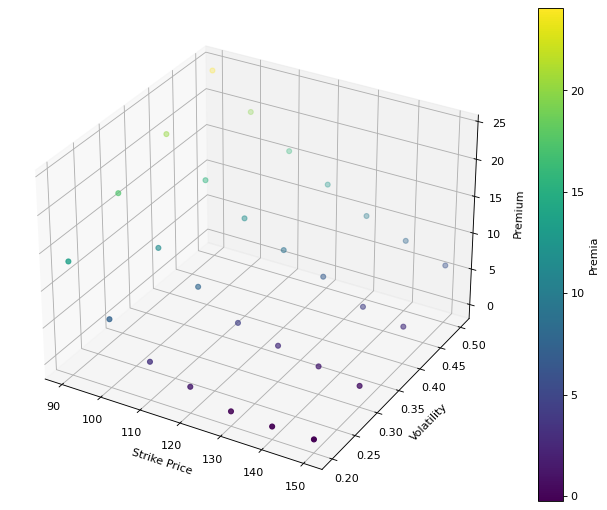

In [393]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import DataFrame

fig = plt.figure()
fig = plt.figure(figsize = (12, 8), dpi=80)
ax = fig.add_subplot(111, projection='3d')

pnt3d = ax.scatter3D(df['strike'], df['volatility'], df['premium'], c=df['premium'])
cbar=plt.colorbar(pnt3d)
cbar.set_label("Premia")
fig.set_facecolor('white')
ax.set_facecolor('white')
ax.set_xlabel('Strike Price')
ax.set_ylabel('Volatility')
ax.set_zlabel('Premium')
plt.show()
        

3. Options are usually priced using risk-neutral probability density functions, which here simply means that we assume a return expection equal to $r_f$. For the same strike prices and volatilities as in question 1., generate risk-neutral returns of the call option and compute their prices as the discounted expected payoff. Compare these option prices to the required option premia computed in question 2.

In [395]:
#define parameters
rf= 0.01
mu = 0.12
vola = (0.2,0.3,0.4,0.5)
#vola = 0.3
call_sp = (90, 100, 110, 120, 130, 140, 150)
#call_sp = 90

rng = np.random.default_rng(1234)

# value of option, risk-neutral return and option price
value_o, return_rn_l, price_o_l, mean_rn_l, combinations_o = [], [], [], [], []


# Loop for short call option 
 # now perspective of the buyer of the option!!
for i in vola:
    for j in call_sp:
        value_o = []
        # simulate "random" yearly returns
        returns_a = rng.lognormal(mean=(mu-(i*i)/2), sigma=i, size=10000)

        # return from long position
        for returns in returns_a:

            # For Risk-neutral returns:
            # first take same struture as for portfolio B, to account different values the option has for different 
            # returns of the underlying asset
            if (100*returns) < j:
                value_o.append(0)  # option will not be executed for r below strike price
            else:
                value_o.append((100*returns - j ) )
                # with execution value is: asset price minus strike price
   
        # calculate risk-neutral returns
        return_exp_o = (np.mean(np.array(value_o)))
        z = return_exp_o - (rf)
        return_rn = (np.array(value_o)) - z
        return_rn_l.append( np.round_((np.array(value_o)) - z, decimals = 4))
        mean_rn_l.append(np.mean(return_rn))
        
        # price is riskneutral profit discounted by 1+rf
        price_o = return_exp_o /(1+rf)
        price_o_l.append( return_exp_o /(1+rf) )

        # append a combination of the vola and strike price to get an overview of the results. 
        combinations_o.append("Volatility:" + str(i) + ", Strike:" + str(j))


data_rn = { "Risk-Neutral Returns": return_rn_l, "Mean": mean_rn_l} 
df_rn = pd.DataFrame(data_rn, index = combinations_o)
print(df_rn)
print("Risk-neutral returns have return of rf in expectation.")

                               
data_rnp = {"Option-Price": price_o_l} 
df_rnp = pd.DataFrame(data_rnp, index = combinations_o)
print("Risk-Neutral Pricing")
print(df_rnp)
print("The Option Prices behave exactly like the option premia." + 
      "We can interpret it as another way of compensating the issuer of the option for his risk.")

                                                         Risk-Neutral Returns  \
Volatility:0.2, Strike:90   [-24.0289, -2.0858, 14.14, -0.0864, 17.3281, 8...   
Volatility:0.2, Strike:100  [-16.043, 28.7515, 51.3428, -16.043, 34.2447, ...   
Volatility:0.2, Strike:110  [-10.3697, -10.3697, -10.3697, -10.3697, -10.3...   
Volatility:0.2, Strike:120  [-6.1215, 13.7632, -6.1215, -6.1215, -6.1215, ...   
Volatility:0.2, Strike:130  [-3.3674, -3.3674, 8.6752, -3.3674, -3.3674, 2...   
Volatility:0.2, Strike:140  [2.4229, -1.8071, -1.8071, 0.5627, -1.8071, -1...   
Volatility:0.2, Strike:150  [-0.8711, -0.8711, -0.8711, -0.8711, -0.8711, ...   
Volatility:0.3, Strike:90   [-19.0679, -27.1055, -2.8252, 27.0528, 84.6417...   
Volatility:0.3, Strike:100  [-19.7231, -19.7231, 39.3749, 24.9712, -11.958...   
Volatility:0.3, Strike:110  [-15.2239, -15.2239, -15.2239, -15.2239, 37.08...   
Volatility:0.3, Strike:120  [-10.5031, -10.5031, 7.3481, -10.5031, -10.503...   
Volatility:0.3, Strike:130  

In [397]:
print(len(value_o))

10000


4. You are now asked to price a down-and-out knock-out call option for the same parameter values as above. A down-and-out knock-out option is similar to a regular European option except that it immediately expires worthless if the price of the underlying drops below a pre-specified level. Set this level here to 90.

    To price a knock-out option, you need to simulate the whole path of the stock price rather than only the price at expiry. Using simulation steps corresponding to one day, compute the approximately appropriate price of these options.

float64


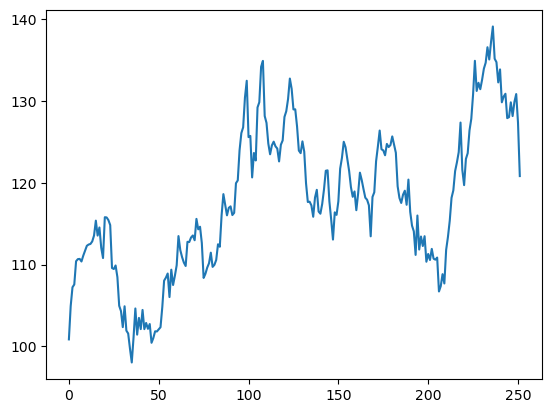

Win


In [400]:
###### Check how all this works with example values:

returns_a = rng.lognormal(mean=(0.12 / 252), sigma=0.02, size=252)
c_returns  = 100*(np.cumprod((returns_a),  axis = 0))
print(c_returns.dtype)
c_ret_l = [100*(np.cumprod((returns_a)))]
# print(c_ret_l)
  
fig, ax = plt.subplots()
ax.plot(np.array(c_returns))
plt.show()

#print(c_ret_l[251])

#Knock.Out Programm:
if any(c_returns < 90) :
    print("KO")
if all(c_returns  > 90):
    print("Win")


In [396]:
# adjust parameters to daily scaling
rf= 0.01
mu = 0.12 / 252                         # divide by trading days
vola = (0.2,0.3,0.4,0.5)/np.sqrt(252)   # divide by sqrt( trading days )
call_sp = (90, 100, 110, 120, 130, 140, 150)
knock_out = 90

rng = np.random.default_rng(1234)

# value of option, risk-neutral return and option price
value_ko, price_ko_l,c_returns_l, combinations_ko = [], [], [], []


for i in vola:
    for j in call_sp:
            value_ko=[]
        #repeat this 10000 times....
            for t in range(1,1001,1):
                
                returns_a = rng.lognormal(mean= (mu-(i*i)/2), sigma=i, size=252)
                  # cumulate daily returns:
                c_returns = 100*(np.cumprod((returns_a)))
                c_returns_l = [100*((np.cumprod((returns_a))))]
  
                if any(c_returns < 90) :
                        value_ko.append(0)
                else:
                    if  (c_returns[251]) < j:
                        # if no knock-out before, just maturity return important
                        value_ko.append(0)  # option will not be executed for r below strike price
                    else:
                        value_ko.append((c_returns[251] - j ) )
                        # with execution value is: asset price at maturity minus strike price
   
        # calculate expected returns
            return_exp_ko = (np.mean(np.array(value_ko)))
                
        # price is profit discounted by 1+rf
            price_ko = return_exp_ko /(1+rf)
            price_ko_l.append( return_exp_ko /(1+rf) )

        # append a combination of the vola and strike price to get an overview of the results. 
            combinations_ko.append("Volatility:" + str(round((i*np.sqrt(252)),2)) + ", Strike:" + str(j))

                       
data_kop = {"Option-Price": price_ko_l} 
df_kop = pd.DataFrame(data_kop, index = combinations_ko)
print("Knock-Out Option Pricing")
print(df_kop)

print("The option is cheaper for higher strike prices, because then it pays out less often. "+
      "For same Strikeprice Price on the one hand higher vola leads to more knock-outs but also more results above strike price."
     + "For lower Strikeprices option price decreases with vola, but for high sp it increases with vola.")

Knock-Out Option Pricing
                            Option-Price
Volatility:0.2, Strike:90      20.571657
Volatility:0.2, Strike:100     14.010611
Volatility:0.2, Strike:110      9.790088
Volatility:0.2, Strike:120      6.231756
Volatility:0.2, Strike:130      2.962307
Volatility:0.2, Strike:140      1.811337
Volatility:0.2, Strike:150      0.550767
Volatility:0.3, Strike:90      17.043360
Volatility:0.3, Strike:100     14.568714
Volatility:0.3, Strike:110     11.391405
Volatility:0.3, Strike:120      8.653455
Volatility:0.3, Strike:130      6.073737
Volatility:0.3, Strike:140      3.914035
Volatility:0.3, Strike:150      2.657447
Volatility:0.4, Strike:90      16.525768
Volatility:0.4, Strike:100     13.687466
Volatility:0.4, Strike:110     11.416287
Volatility:0.4, Strike:120     10.080061
Volatility:0.4, Strike:130      8.056737
Volatility:0.4, Strike:140      6.577431
Volatility:0.4, Strike:150      4.463459
Volatility:0.5, Strike:90      16.517655
Volatility:0.5, Strike:100     1

In [387]:
##### Check Results: #####

print(c_returns[251])  #last result of asset returns works properly
# print(len(value_ko))   # we get 1000 observations of the value of the option -> nice
print(value_ko)       # some values are zero for knock-out , perfect!

226.46180976502635
1000
